In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

![adalen](adaline.png)

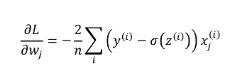 

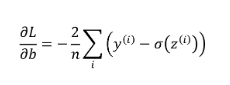

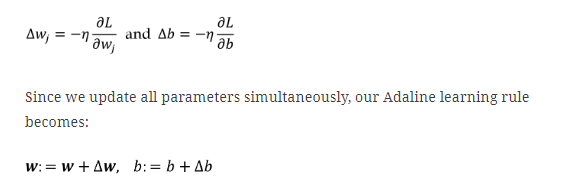

In [3]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function values in each epoch.    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)

In [4]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df = iris[iris.species != 'virginica']
iris_df.species.value_counts()

species
setosa        50
versicolor    50
Name: count, dtype: int64

In [7]:
X = iris_df.iloc[:,[0,2]].values
y = iris_df['species'].values

In [8]:
y = np.where(y == 'setosa', 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

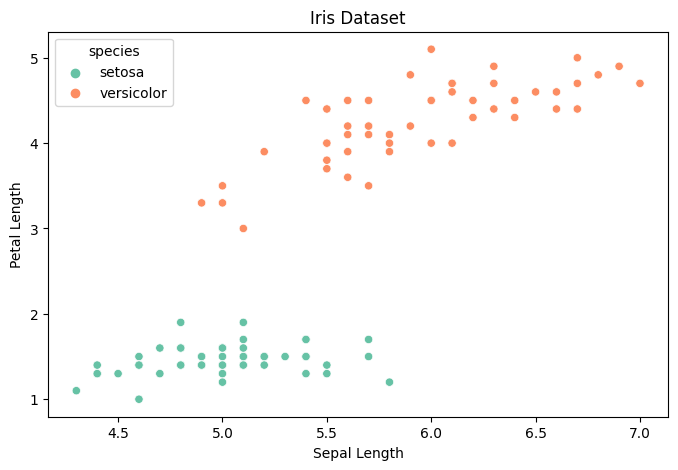

In [9]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    x='sepal_length', 
    y='petal_length', 
    hue='species', 
    data=iris_df,
    palette='Set2'
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [10]:
ada1 = AdalineGD(n_iter=14, eta=0.1).fit(X, y)
ada1.w_, ada1.b_

(array([-5.65367839e+10, -3.16314739e+10]), -10123053362.359009)

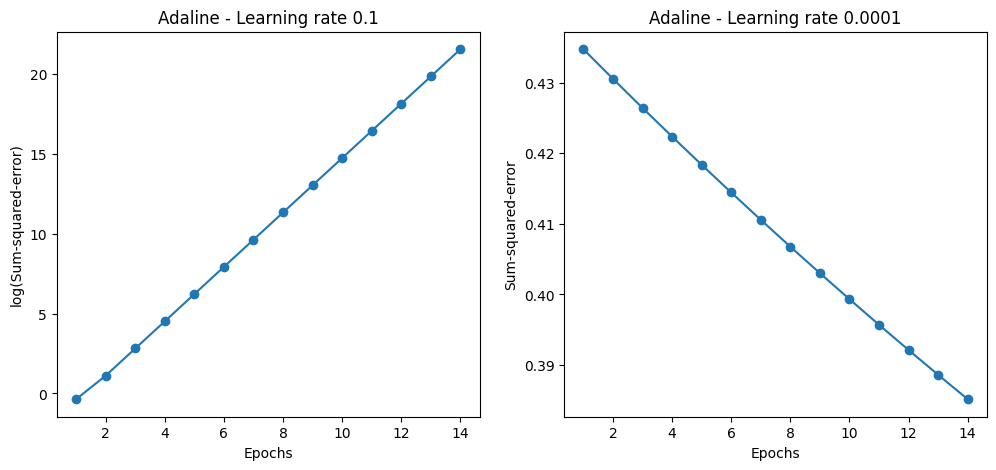

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=14, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

## Standardization

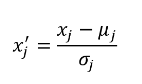

In [12]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [13]:
ada_gd = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y)
ada_gd.w_, ada_gd.b_

(array([-0.08630715,  0.54761074]), 0.5)

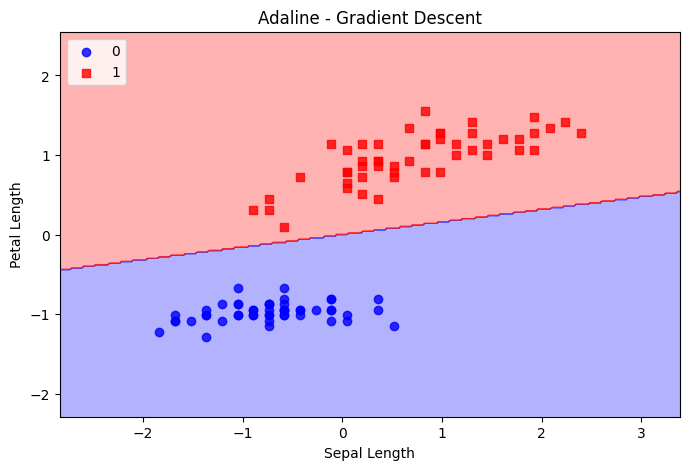

In [29]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# descision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's')
    colors = ('blue', 'red')
    cmap = ListedColormap(['blue', 'red'])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(
        np.array([x1.ravel(), x2.ravel()]).T
    )
    Z = Z.reshape(x1.shape)
    plt.figure(figsize=(8, 5))
    plt.contourf(x1, x2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            marker=markers[idx],
            label=cl
        )
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title('Adaline - Gradient Descent')
    plt.legend(loc='upper left')
    plt.show()

plot_decision_regions(X_std, y, classifier=ada_gd)

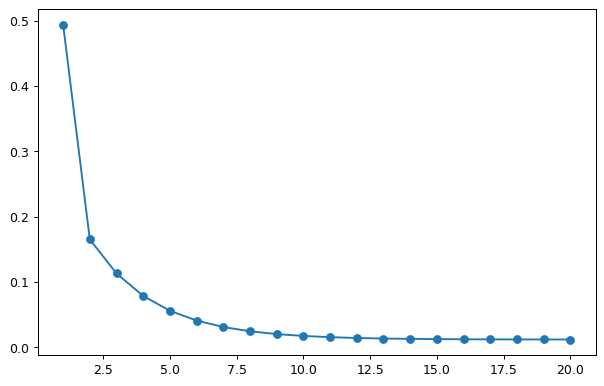

In [16]:
plt.figure(figsize=(8, 5), dpi=90)
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')

In [19]:
ada_gd.predict(X_std) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])